# FDW Crop Production Data Analysis - South Africa

## Report 1: Year-off problem

In [19]:
# Reproduce the year-off problem in FDW-ZA crop data
import json, requests
import pandas as pd
host = 'https://fdw.fews.net'
auth = tuple(json.loads(open('token.json', "r").read()))
parameters = {
    'format': 'json',
    'country': 'South Africa',
    'product': 'R011',
    'survey_type': 'crop:best'
}
endpoint = '/api/cropproductionindicatorvalue/'
response = requests.get(host + endpoint, auth=auth, params=parameters, proxies={})
response.raise_for_status()
df = pd.DataFrame.from_records(response.json())
# Remove national level values
df = df[df['fnid'] != 'ZA1994A0'].reset_index(drop=True)
# Table of "Maize Grain (Yellow)"
sub = df[
    (df['season_name'] == 'Summer') &
    (df['product'].isin(['Maize Grain (Yellow)'])) &
    (df['indicator'] == 'Quantity Produced')
]
sub.pivot_table(
    index=['start_date','period_date','season_name','season_type','season_date','season_year'],
    columns='product',values='value',aggfunc='sum'
).tail()

,,,,,product,Maize Grain (Yellow)
start_date,period_date,season_name,season_type,season_date,season_year,
2017-02-01,2017-02-28,Summer,Harvest,2016-10-01,Summer 2016,4283100.0
2017-04-01,2017-04-30,Summer,Harvest,2016-10-01,Summer 2016,4283100.0
2018-04-01,2018-04-30,Summer,Harvest,2017-10-01,Summer 2017,6904000.0
2019-04-01,2019-04-30,Summer,Harvest,2018-10-01,Summer 2018,6129650.0
2020-04-01,2020-04-30,Summer,Harvest,2019-10-01,Summer 2019,5648080.0


## Report 2: Duplication problem 

In [20]:
# Reproduce the year-off problem in FDW-ZA crop data
import json, requests
import pandas as pd
host = 'https://fdw.fews.net'
auth = tuple(json.loads(open('token.json', "r").read()))
parameters = {
    'format': 'json',
    'country': 'South Africa',
    'product': 'R011',
    'survey_type': 'crop:best'
}
endpoint = '/api/cropproductionindicatorvalue/'
response = requests.get(host + endpoint, auth=auth, params=parameters, proxies={})
response.raise_for_status()
df = pd.DataFrame.from_records(response.json())
# Remove national level values
df = df[df['fnid'] != 'ZA1994A0'].reset_index(drop=True)
# Add "None" to undefined [publication_name]
df.loc[df['publication_name'] == '','publication_name'] = 'None'
# Table of "Maize Grain (Yellow)"
sub = df[
    (df['season_name'] == 'Summer') &
    (df['product'].isin(['Maize Grain (Yellow)'])) &
    (df['indicator'] == 'Quantity Produced')
]
sub.pivot_table(
    index=['start_date','period_date','season_date','season_year'],
    columns=['product','publication_name'],values='value',aggfunc='sum'
).tail()

product                                           Maize Grain (Yellow)  \
publication_name                               CEC, 2001, South Africa   
start_date period_date season_date season_year                           
2017-02-01 2017-02-28  2016-10-01  Summer 2016                     NaN   
2017-04-01 2017-04-30  2016-10-01  Summer 2016                     NaN   
2018-04-01 2018-04-30  2017-10-01  Summer 2017                     NaN   
2019-04-01 2019-04-30  2018-10-01  Summer 2018                     NaN   
2020-04-01 2020-04-30  2019-10-01  Summer 2019                     NaN   

product                                                                 \
publication_name                               CEC, 2016, South Africa   
start_date period_date season_date season_year                           
2017-02-01 2017-02-28  2016-10-01  Summer 2016               4283100.0   
2017-04-01 2017-04-30  2016-10-01  Summer 2016                     NaN   
2018-04-01 2018-04-30  2017-10-01  Summer 2017                     NaN   
2019-04-01 2019-04-30  2018-10-01  Summer 2018                     NaN   
2020-04-01 2020-04-30  2019-10-01  Summer 2019                     NaN   

product                                                                \
publication_name                               FEWS NET, South Africa   
start_date period_date season_date season_year                          
2017-02-01 2017-02-28  2016-10-01  Summer 2016                    NaN   
2017-04-01 2017-04-30  2016-10-01  Summer 2016                    NaN   
2018-04-01 2018-04-30  2017-10-01  Summer 2017                    NaN   
2019-04-01 2019-04-30  2018-10-01  Summer 2018                    NaN   
2020-04-01 2020-04-30  2019-10-01  Summer 2019                    NaN   

product                                                    \
publication_name                                     None   
start_date period_date season_date season_year              
2017-02-01 2017-02-28  2016-10-01  Summer 2016        NaN   
2017-04-01 2017-04-30  2016-10-01  Summer 2016  4283100.0   
2018-04-01 2018-04-30  2017-10-01  Summer 2017  6904000.0   
2019-04-01 2019-04-30  2018-10-01  Summer 2018  6129650.0   
2020-04-01 2020-04-30  2019-10-01  Summer 2019  5648080.0   

product                                                                               
publication_name                               Official Database, 2016, South Africa  
start_date period_date season_date season_year                                        
2017-02-01 2017-02-28  2016-10-01  Summer 2016                                   NaN  
2017-04-01 2017-04-30  2016-10-01  Summer 2016                                   NaN  
2018-04-01 2018-04-30  2017-10-01  Summer 2017                                   NaN  
2019-04-01 2019-04-30  2018-10-01  Summer 2018                                   NaN  
2020-04-01 2020-04-30  2019-10-01  Summer 2019                                   NaN

## Report 3: Duplication between products

In [21]:
# Reproduce the year-off problem in FDW-ZA crop data
import json, requests
import pandas as pd
host = 'https://fdw.fews.net'
auth = tuple(json.loads(open('token.json', "r").read()))
parameters = {
    'format': 'json',
    'country': 'South Africa',
    'product': 'R011',
    'survey_type': 'crop:best'
}
endpoint = '/api/cropproductionindicatorvalue/'
response = requests.get(host + endpoint, auth=auth, params=parameters, proxies={})
response.raise_for_status()
df = pd.DataFrame.from_records(response.json())
# Remove national level values
df = df[df['fnid'] != 'ZA1994A0'].reset_index(drop=True)
# Table of all products
sub = df[
    (df['season_name'] == 'Summer') &
    (df['indicator'] == 'Quantity Produced')
]
sub.pivot_table(
    index=['start_date','period_date','season_name','season_type','season_date','season_year'],
    columns='product',values='value',aggfunc='sum'
).tail(25)

,,,,,product,Maize Grain (White),Maize Grain (Yellow),Sorghum,Wheat Grain
start_date,period_date,season_name,season_type,season_date,season_year,,,,
2007-02-01,2007-02-28,Summer,Harvest,2006-10-01,Summer 2006,4038900.0,2430600.0,NaN,96000.0
2007-04-01,2007-04-30,Summer,Harvest,2006-10-01,Summer 2006,4038900.0,2430600.0,96000.0,NaN
2008-02-01,2008-02-29,Summer,Harvest,2007-10-01,Summer 2007,4315000.0,2810000.0,NaN,169700.0
2008-04-01,2008-04-30,Summer,Harvest,2007-10-01,Summer 2007,4315000.0,2810000.0,169700.0,NaN
2009-02-01,2009-02-28,Summer,Harvest,2008-10-01,Summer 2008,7480000.0,5220000.0,NaN,255000.0
2009-04-01,2009-04-30,Summer,Harvest,2008-10-01,Summer 2008,7480000.0,5220000.0,255000.0,NaN
2010-02-01,2010-02-28,Summer,Harvest,2009-10-01,Summer 2009,6775000.0,5275000.0,NaN,276500.0
2010-04-01,2010-04-30,Summer,Harvest,2009-10-01,Summer 2009,6775000.0,5275000.0,276500.0,NaN
2011-02-01,2011-02-28,Summer,Harvest,2010-10-01,Summer 2010,7830000.0,4985000.0,NaN,196500.0


In [22]:
# # FDW API host address -------------------------- #
# host = 'https://fdw.fews.net'
# auth = tuple(json.loads(open('token.json', "r").read()))
# parameters = {
#     'format': 'json',
#     'country': 'South Africa',
#     'product': 'R011',
#     'survey_type': 'crop:best'
# }
# endpoint = '/api/cropproductionindicatorvalue/'
# response = requests.get(host + endpoint, auth=auth, params=parameters, proxies={})
# response.raise_for_status()
# df = pd.DataFrame.from_records(response.json())
# df_origin = df.copy()
# # ----------------------------------------------- #

# # FDW raw data
# df = df_origin.copy()
# df = df[df['fnid'] != 'ZA1994A0'].reset_index(drop=True)
# df = df[
#     (df['status'] == 'Collected') &
#     (df['season_name'] == 'Summer') &
#     (df['indicator'] == 'Quantity Produced') &
#     (df['product'].isin(['Maize Grain (White)', 'Maize Grain (Yellow)']))
# ]
# # Drop duplicated values by selecting values having more recent "collection_date".
# cols = ['fnid','product','season_name','season_date','indicator','value']
# df = df.sort_values(by=['collection_date']).drop_duplicates(cols, keep='last').reset_index(drop=True)
# df['year'] = pd.to_datetime(df['season_date']).dt.year
# data = df.pivot_table(index='year',columns='product',values='value',aggfunc='sum').sum(1)
# years = np.array(data.index)

## Validation with FAO data and CHIRPS

In [26]:
# Load GSCD crop data
country_iso, country_name = 'ZA', 'South Africa'
df = pd.read_hdf('./data/crop/adm_crop_production_%s.hdf' % country_iso)
df = df[df['gscd_code']=='calibrated']; fnids = list(df['fnid'].unique())
data_fdw = df[
    (df['season_name'] == 'Summer') &
    (df['product'].isin(['Maize (White)','Maize (Yellow)'])) &
    (df['indicator'] == 'production')
]
data_fdw['year'] = data_fdw['harvest_year']
data_fdw = data_fdw.pivot_table(index='year',columns='product',values='value',aggfunc='sum')
data_fdw.tail()

product,Maize (White),Maize (Yellow)
year,,
2015,4735000.0,5220000.0
2016,3253775.0,4283100.0
2017,9916000.0,6904000.0
2018,6759800.0,6129650.0
2019,5538240.0,5648080.0


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load GSCD crop data
country_iso, country_name = 'ZA', 'South Africa'
df = pd.read_hdf('./data/crop/adm_crop_production_%s.hdf' % country_iso)
df = df[df['gscd_code']=='calibrated']; fnids = list(df['fnid'].unique())
data_fdw = df[
    (df['season_name'] == 'Summer') &
    (df['product'].isin(['Maize (White)','Maize (Yellow)'])) &
    (df['indicator'] == 'production')
]
data_fdw['year'] = data_fdw['harvest_year']
data_fdw = data_fdw.pivot_table(index='year',columns='product',values='value',aggfunc='sum').sum(1).rename('Maize')
data_fdw.index = data_fdw.index

# Load FAO-STAT National Production Data
df = pd.read_csv('./data/crop/adm_fao_stat.csv', index_col=0)
data_fao1 = df[
    (df['cnt_name'] == 'South Africa') &
    (df['cpc2_name'] == 'Maize (corn)') &
    (df['indicator'] == 'Production')
].set_index('year')['value']
data_fao1.index = data_fao1.index

# Load FAO-AgroMaps Subnational Production Data
df = pd.read_csv('./data/crop/adm_fao_agromaps.csv', index_col=0, low_memory=False)
data_fao2 = df[
    (df['cnt_name'] == 'South Africa') &
    (df['cpc2_name'] == 'Maize (corn)') &
    (df['adm_level'] == 1) &
    (df['indicator'] == 'Production')
].pivot_table(index='year',columns='admx_code',values='value')
data_fao2.index = data_fao2.index
data_fao2 = data_fao2.sum(1)

# Merge all data
data = pd.concat([data_fdw,data_fao1,data_fao2], axis=1, keys=['FDW','FAO_STAT','FAO_AMAP']).sort_index()
data.tail(10)

,FDW,FAO_STAT,FAO_AMAP
year,,,
2011,10360000.0,10360000.0,NaN
2012,12120656.0,12120656.0,NaN
2013,11810600.0,11810600.0,NaN
2014,14250000.0,14250000.0,NaN
2015,9955000.0,9955000.0,NaN
2016,7536875.0,7778500.0,NaN
2017,16820000.0,16820000.0,NaN
2018,12889450.0,12510000.0,NaN
2019,11186320.0,11275500.0,NaN


Correlation:
          FAO_STAT       FDW  FAO_AMAP      PRCP
FAO_STAT  1.000000  0.988055  0.974926  0.259693
FDW       0.988055  1.000000  0.972340  0.370432
FAO_AMAP  0.974926  0.972340  1.000000  0.729243
PRCP      0.259693  0.370432  0.729243  1.000000



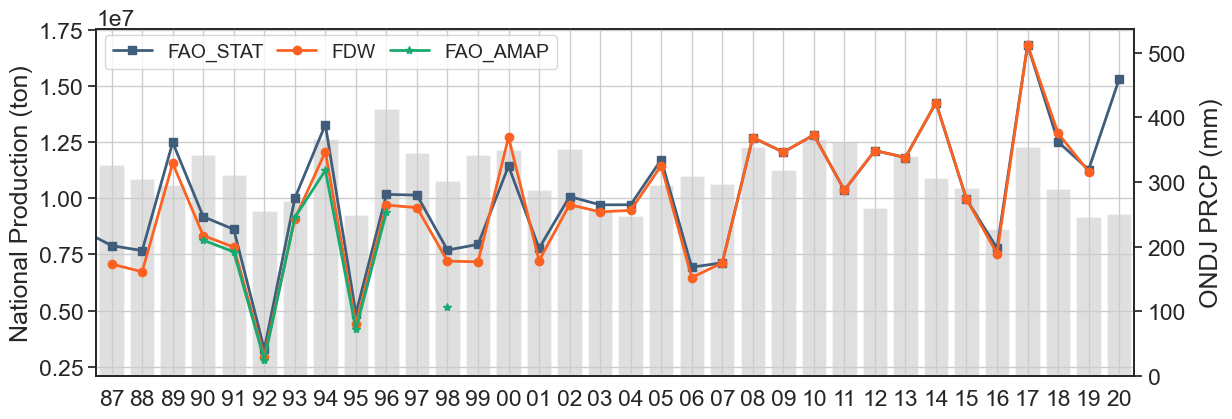

In [32]:
# Load precipitation
prcp = pd.read_hdf('./data/adm.prcp.chirps-v2.crop.extended.hdf')[fnids]
prcp = prcp.resample('1M').agg('sum')
prcp.index = prcp.index.map(lambda x: x.replace(day=1))
assert prcp.isna().sum().sum() == 0 # if not, use FillMissMonthMean
# National seasonal precipitation
prcp_nat = prcp.mean(1).rename('PRCP')
# Forward rolling summation
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=4)   # Forward Rolling Window
prcp_nat = prcp_nat.rolling(window=indexer, min_periods=1).sum()
prcp_nat = prcp_nat[prcp_nat.index.month == 10]                      # Start month
prcp_nat = prcp_nat.groupby(prcp_nat.index.year).sum()
prcp_label = 'ONDJ PRCP (mm)'
prcp_nat.index += 1  # As this starts from October of planting year

# [Question] All FDW, FAOSTAT, FAO-AgroMAPS have year shift issue?
# Correlations with data
corr_value = pd.concat([data,prcp_nat],axis=1).corr()
print(f'Correlation:\n{corr_value}')
print('')

# years = data['FDW'].dropna().index
years = np.arange(1987,2021)
sns.set(style="white", font_scale=1.5)
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(12,4))
data = data[['FAO_STAT','FDW','FAO_AMAP']]
data.plot(ax=ax1, legend=None, linewidth=2, color=['#405E7B','#FB6222','#17AB6F'])
marker=['s', 'o', '*']
for i, line in enumerate(ax1.get_lines()):
    line.set_marker(marker[i])
ax1.set_xlim([years.min()-0.5, years.max()+0.5])
ax1.set_xticks(years)
ax1.set_xticklabels(['%02d'% yr for yr in np.mod(years,100)])
ax1.xaxis.grid(True)
ax1.grid(True)
ax1.set_xlabel('')
ax1.set_ylabel('National Production (ton)')
year, value = prcp_nat.index, prcp_nat.values
ax2 = ax1.twinx()
plt.bar(year, value, alpha=.25, color='grey')
ax2.set_ylim([0, value.max()*1.3])
ax2.set_ylabel(prcp_label, labelpad=10)
ax1.set_zorder(1)  # default zorder is 0 for ax1 and ax2
ax1.patch.set_visible(False)  # prevents ax1 from hiding ax2
ax1.legend(bbox_to_anchor=(0.453, 1.01), columnspacing=0.7, ncol=3, fontsize=14)
plt.tight_layout(pad=0)
plt.show()